<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.shape
boston_df.head()
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


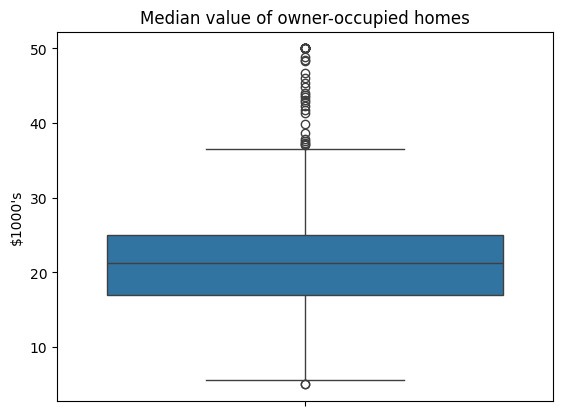

In [39]:
ax = sns.boxplot(boston_df["MEDV"])
ax.set_ylabel("$1000's")
ax.set_title('Median value of owner-occupied homes')
pyplot.show()

The meadian value of owner-occupied homes is at 21.2k.
Values a ranging from 5k to 50k.
First quartile 17.025k.
Third quartile 25k.

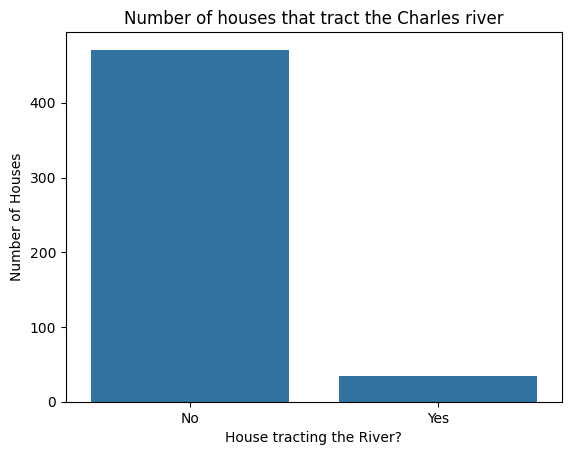

In [33]:
ax = sns.barplot(x=["No","Yes"], y=boston_df["CHAS"].value_counts())
ax.set_title('Number of houses that tract the Charles river')
ax.set_ylabel("Number of Houses")
ax.set_xlabel("House tracting the River?")
pyplot.show()

The most houses are not tracting the Charles river.

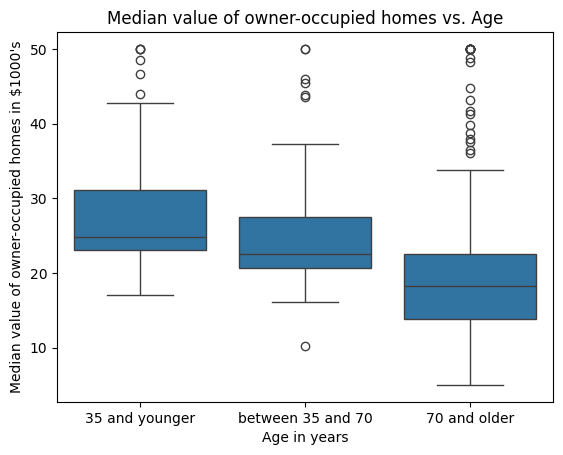

In [59]:
boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = "35 and younger"
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70),'age_group'] = "between 35 and 70"
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = "70 and older"

ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df, order=["35 and younger","between 35 and 70","70 and older"])
ax.set_title('Median value of owner-occupied homes vs. Age')
ax.set_xlabel("Age in years")
ax.set_ylabel("Median value of owner-occupied homes in $1000's")
pyplot.show()

The median value of owner-occupied homes if falling with the age.

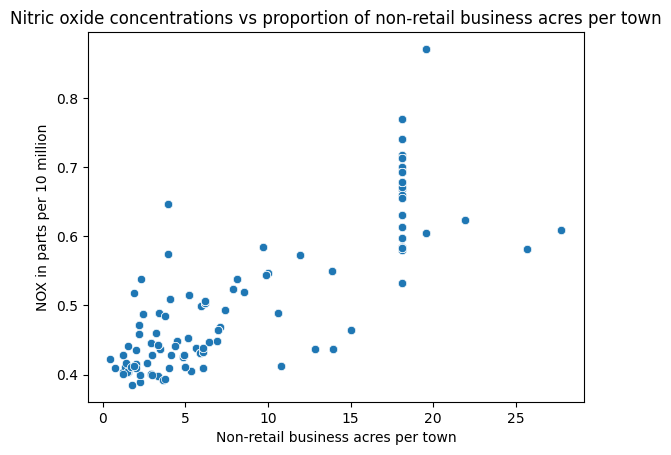

In [48]:
ax = sns.scatterplot(x="INDUS", y="NOX", data= boston_df)
ax.set_title('Nitric oxide concentrations vs proportion of non-retail business acres per town')
ax.set_ylabel("NOX in parts per 10 million")
ax.set_xlabel("Non-retail business acres per town")
pyplot.show()

The nitric oxide concentration rises with the proportion of non-retail business acres per town.

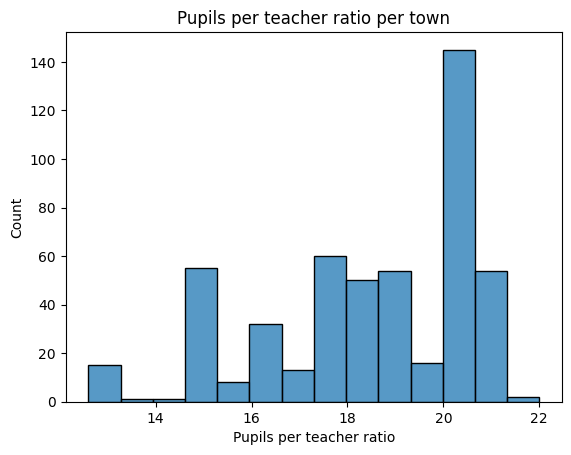

In [53]:
ax = sns.histplot(boston_df["PTRATIO"])
ax.set_title('Pupils per teacher ratio per town')
ax.set_xlabel('Pupils per teacher ratio')
pyplot.show()

The pupil to teacher ratio per town ranges between 12.6 and 22.
A lot of towns have a pupil to teacher ratio between 20 and 21.

**Question 1:** Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

*   $H\_0: µ\_1 = µ\_2$ ("There is no difference in median value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("There is a difference in median value of houses bounded by the Charles river")

In [65]:
scipy.stats.levene(boston_df[boston_df["CHAS"]==0]["MEDV"],
                   boston_df[boston_df["CHAS"]==1]["MEDV"], center ='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value is smaller than 0.05 we can't assume equality of variance

In [62]:
scipy.stats.ttest_ind(boston_df[boston_df["CHAS"]==0]["MEDV"],
                   boston_df[boston_df["CHAS"]==1]["MEDV"], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value based on bound to the Charles river

**Question 2:** Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (there is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940)
*   $H\_1:$ (there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940)

In [67]:
# We create age groups:
boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = "35 and younger"
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70),'age_group'] = "between 35 and 70"
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = "70 and older"

In [69]:
#Test for equality of variance
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 and older']['MEDV'], 
                   center='mean')
# since the p-value is higher than 0.05, the variance are equal.

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [70]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['age_group'] == '35 and younger']['MEDV'], boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV'], boston_df[boston_df['age_group'] == '70 and older']['MEDV'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence
that at least one of the means differ. There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.

**Question 3:** Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

*   $H\_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town


In [72]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** Since the p-value < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  proportion of non-retail business acres per town and Nitric oxide concentrations.

**Question 4:** What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

*   $H\_0:$ There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
*   $H\_1:$ There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

In [75]:
X = boston_df["DIS"]
y = boston_df["MEDV"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predicitons = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 04 May 2024   Prob (F-statistic):           1.21e-08
Time:                        12:57:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value based of an additional weighted distance to the five Boston employment centres.
One additional weighted distance to the five Boston employment centres increases the MEDV by 1.0916.